In [18]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset
rgb_results = pd.read_csv('rgb_results.csv')
noreg_results = pd.read_csv('noregularizaion_results.csv')
cnn_results = pd.read_csv('cnn_results.csv')
linear_results = pd.read_csv('linear_results.csv')

In [19]:
# remove unused interaions in this run
agg = (linear_results['run'] == '20250417-080552-LineShakeLowv4.2_0') & (linear_results['step'] > 14_958_000)
print(agg.shape)
linear_results = linear_results.drop(agg[agg].index)

(884,)


In [20]:
rgb_results.head()

,run,step,rollout/ep_len_mean,rollout/ep_rew_mean,time/fps,train/approx_kl,train/clip_fraction,train/clip_range,train/entropy_loss,train/explained_variance,train/learning_rate,train/loss,train/policy_gradient_loss,train/segmentation_loss,train/value_loss
0,20250323-171342-SaveDegreeBillionv3.1_0,8192,79.230003,1.46,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20250323-171342-SaveDegreeBillionv3.1_0,16384,89.029999,2.34,84.0,0.015987,0.258240,0.2,-2.667034,-0.000086,0.0001,-0.177363,-0.281457,0.019593,0.210166
2,20250323-171342-SaveDegreeBillionv3.1_0,24576,83.320000,1.68,74.0,0.012240,0.152356,0.2,-2.672818,0.040644,0.0001,-0.151632,-0.331754,0.012346,0.326516
3,20250323-171342-SaveDegreeBillionv3.1_0,32768,85.019997,2.06,73.0,0.012163,0.073181,0.2,-2.665563,-0.027707,0.0001,-0.000512,-0.100514,0.010242,0.254468
4,20250323-171342-SaveDegreeBillionv3.1_0,40960,91.690002,2.30,73.0,0.012249,0.071912,0.2,-2.639292,0.099898,0.0001,0.016388,-0.134150,0.010746,0.320981


In [21]:
# drop na
rgb_results = rgb_results.dropna()
noreg_results = noreg_results.dropna()
cnn_results = cnn_results.dropna()

In [22]:
x_ticks = list(range(0, 55_000_000, 5_000_000))
x_ticks_labels = list(range(0, 55_000_000, 5_000_000))
x_ticks_labels = [str(x//1_000_000) for x in x_ticks_labels]
x_ticks_labels = [x + 'M' for x in x_ticks_labels]
x_ticks_labels[0] = '0'

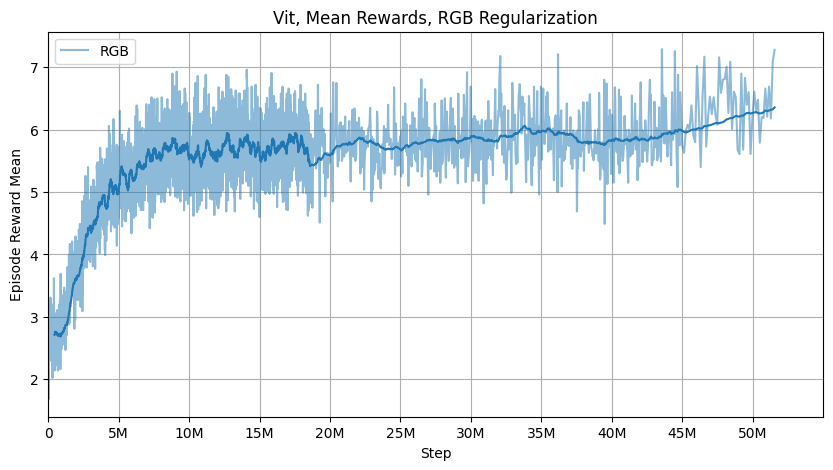

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(rgb_results['step'], rgb_results['rollout/ep_rew_mean'], alpha=0.5, label='RGB')
plt.plot(rgb_results['step'], rgb_results['rollout/ep_rew_mean'].rolling(50).mean(), color="tab:blue")
plt.xlim(0, 55_000_000)
plt.xlabel('Step')
plt.ylabel('Episode Reward Mean')
plt.title('Vit, Mean Rewards, RGB Regularization')
plt.xticks(x_ticks, x_ticks_labels)
plt.legend()
plt.grid()

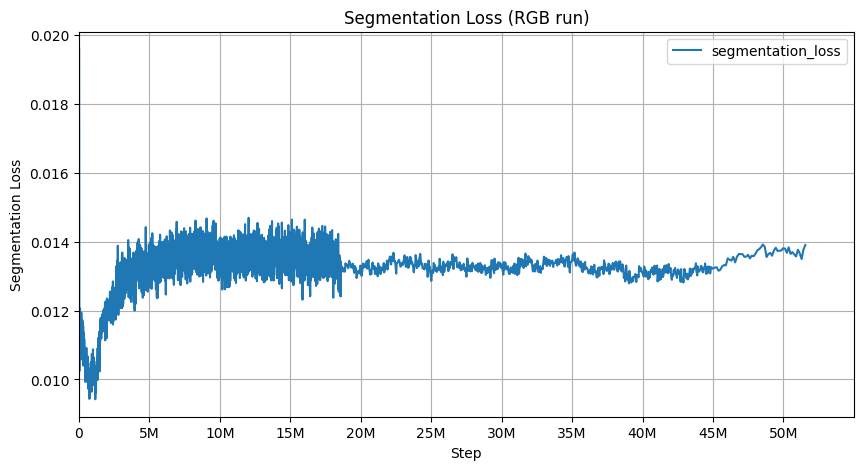

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(rgb_results['step'], rgb_results['train/segmentation_loss'], label='segmentation_loss')
plt.xlim(0, 55_000_000)

plt.xlabel('Step')
plt.ylabel('Segmentation Loss')
plt.title('Segmentation Loss (RGB run)')
plt.xticks(x_ticks, x_ticks_labels)
plt.grid()
plt.legend()

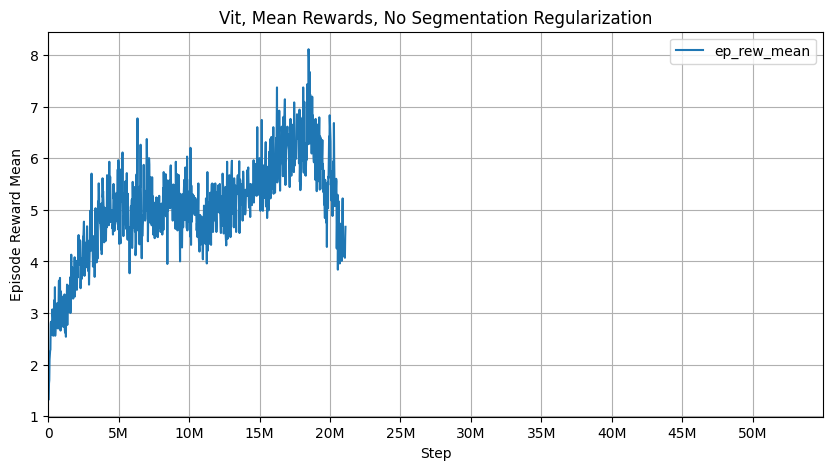

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(noreg_results['step'], noreg_results['rollout/ep_rew_mean'], label='ep_rew_mean')
plt.xlim(0, 55_000_000)
plt.xlabel('Step')
plt.ylabel('Episode Reward Mean')
plt.title('Vit, Mean Rewards, No Segmentation Regularization')
plt.xticks(x_ticks, x_ticks_labels)
plt.legend()
plt.grid()

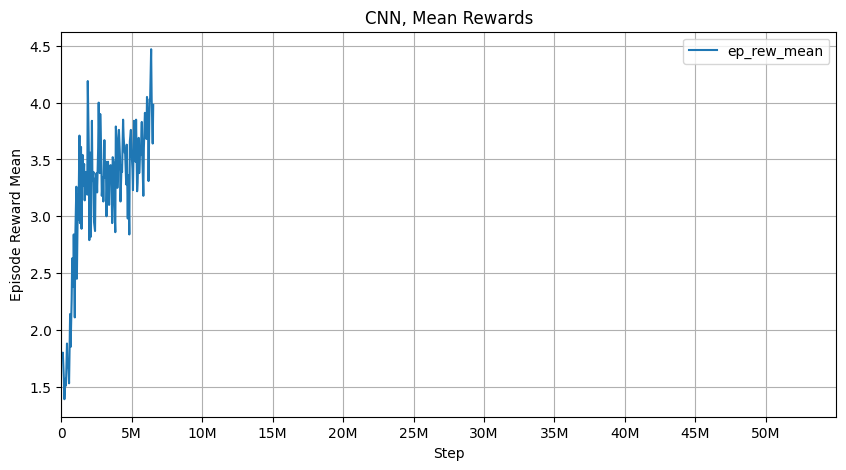

In [26]:
plt.figure(figsize=(10, 5))
plt.xlim(0, 55_000_000)
plt.plot(cnn_results['step'], cnn_results['rollout/ep_rew_mean'], label='ep_rew_mean')
plt.xlabel('Step')
plt.ylabel('Episode Reward Mean')
plt.title('CNN, Mean Rewards')
plt.xticks(x_ticks, x_ticks_labels)
plt.legend()
plt.grid()

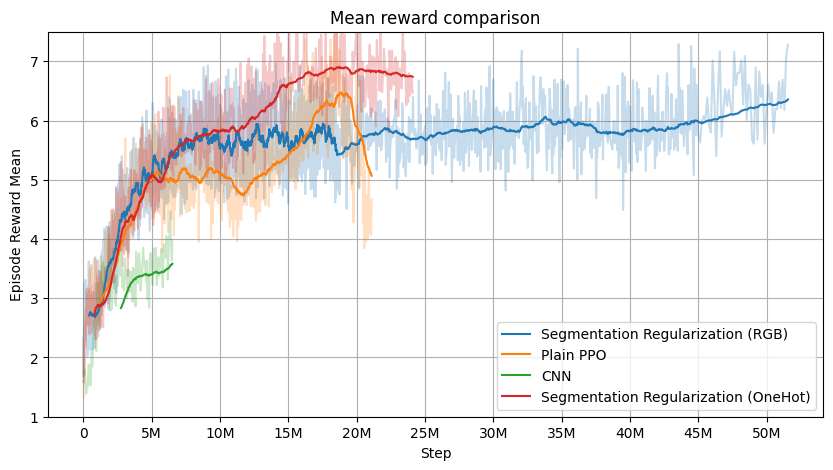

In [27]:
# ovarlay rward
plt.figure(figsize=(10, 5))
plt.plot(rgb_results['step'], rgb_results['rollout/ep_rew_mean'], alpha=0.25)
plt.plot(noreg_results['step'], noreg_results['rollout/ep_rew_mean'], alpha=0.25)
plt.plot(cnn_results['step'], cnn_results['rollout/ep_rew_mean'], alpha=0.25)
plt.plot(linear_results['step'], linear_results['rollout/ep_rew_mean'], alpha=0.25)
plt.plot(rgb_results['step'], rgb_results['rollout/ep_rew_mean'].rolling(50).mean(), label='Segmentation Regularization (RGB)', color='tab:blue')
plt.plot(noreg_results['step'], noreg_results['rollout/ep_rew_mean'].rolling(50).mean(), label='Plain PPO', color='tab:orange')
plt.plot(cnn_results['step'], cnn_results['rollout/ep_rew_mean'].rolling(50).mean(), label='CNN', color='tab:green')
plt.plot(linear_results['step'], linear_results['rollout/ep_rew_mean'].rolling(50).mean(), label='Segmentation Regularization (OneHot)', color='tab:red')
plt.xlabel('Step')
plt.ylim(1, 7.5)
plt.ylabel('Episode Reward Mean')
plt.title('Mean reward comparison')

plt.xticks(x_ticks, x_ticks_labels)
plt.grid()
plt.legend()